# Week5 - Logistic Regression Assignment

- Run the below cells.
- Complete all of the numbered questions. You may call any packages that we've used in class.  

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/employee-turnover-balanced.csv')
df.head()

left_company  age frequency_of_travel              department  \
0           No   37       Travel_Rarely                   Sales   
1           No   39       Travel_Rarely  Research & Development   
2           No   52   Travel_Frequently  Research & Development   
3           No   50          Non-Travel                   Sales   
4           No   44       Travel_Rarely  Research & Development   

   commuting_distance  education  satisfaction_with_environment  gender  \
0                  16          4                              4    Male   
1                   3          2                              3    Male   
2                  25          4                              3  Female   
3                   1          3                              4  Female   
4                   4          3                              4    Male   

   seniority_level                   position  satisfaction_with_job  \
0                2            Sales Executive                      3   
1                2      Laboratory Technician                      3   
2                4     Manufacturing Director                      4   
3                2            Sales Executive                      3   
4                2  Healthcare Representative                      2   

  married_or_single  last_raise_pct  last_performance_rating  \
0          Divorced              19                        3   
1          Divorced              15                        3   
2           Married              22                        4   
3           Married              12                        3   
4            Single              12                        3   

   total_years_working  years_at_company  years_in_current_job  \
0                    9                 1                     0   
1                   11                10                     8   
2                   31                 9                     8   
3                   19                18                     7   
4                   10                 5                     2   

   years_since_last_promotion  years_with_current_supervisor  
0                           0                              0  
1                           0                              7  
2                           0                              0  
3                           0                             13  
4                           2                              3

## Data Definitions
- `left_company`: Whether individual left the company or not. This is the target variable.  
- `age`: Age of individual. 
- `frequency_of_travel`: How often person travels for work.  
- `department`: Department person works(worked).  
- `commuting_distance`: Distance person lives from office.  
- `education`: Highest education category.  
- `satisfaction_with_environment`: Satisfaction of environment, on lickert scale.  
- `gender`: Gender of individual.  
- `seniority_level`: Seniority level of individual.  
- `position`: Last position held at the company.  
- `satisfaction_with_job`: Satisfaction of their job, on lickert scale.  
- `married_or_single`: Marital status of person.  
- `last_raise_pct`: Percent increase their last raise represented.  
- `last_performance_rating`: Most recent annual performance rating, on lickert scale.  
- `total_years_working`: Number of years the individual has spent working in their career.  
- `years_at_company`: Number of years the individual has been at the company, regardless of position.  
- `years_in_current_job`: Number of years the individual has been in their current position.  
- `years_since_last_promotion`: Years since the person had their last promotion.  
- `years_with_current_supervisor`: Years the person has had their current supervisor.

# Question 1
- What is the distribution of the target (`left_company`)?  
- Do you have any concerns on class imbalances?

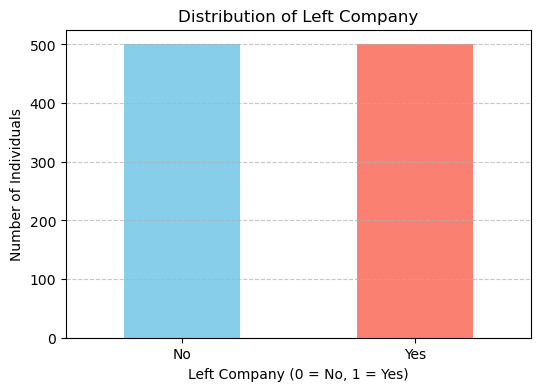

In [9]:
# Plotting the distribution of the target variable 'left_company'
plt.figure(figsize=(6, 4))
df['left_company'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Left Company')
plt.xlabel('Left Company (0 = No, 1 = Yes)')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.ylabel('Number of Individuals')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Imbalance: If one class (either left_company = 0 or left_company = 1) has significantly more observations than the other, this indicates class imbalance. For example, if there are much more 0s (not left) than 1s (left), the model might be biased towards predicting the majority class.

Model Performance: In cases of class imbalance, traditional evaluation metrics like accuracy can be misleading. For example, if 90% of the data belongs to one class, a model that simply predicts that class would still achieve 90% accuracy, even if it fails to predict the minority class.

# Question 2
- Do a quick EDA
- Can you create new features that captures the relation with the target better?

In [13]:
# Check the shape of the dataset
print(f'Dataset shape: {df.shape}')

Dataset shape: (1000, 19)


In [15]:
# Check for missing values
print(df.isnull().sum())

left_company                     0
age                              0
frequency_of_travel              0
department                       0
commuting_distance               0
education                        0
satisfaction_with_environment    0
gender                           0
seniority_level                  0
position                         0
satisfaction_with_job            0
married_or_single                0
last_raise_pct                   0
last_performance_rating          0
total_years_working              0
years_at_company                 0
years_in_current_job             0
years_since_last_promotion       0
years_with_current_supervisor    0
dtype: int64


In [17]:
# Get summary statistics of the dataset
print(df.describe())

               age  commuting_distance    education  \
count  1000.000000         1000.000000  1000.000000   
mean     35.713000            9.593000     2.864000   
std       9.366556            8.118452     1.029837   
min      18.000000            1.000000     1.000000   
25%      29.000000            2.000000     2.000000   
50%      34.000000            8.000000     3.000000   
75%      42.000000           15.000000     4.000000   
max      60.000000           29.000000     5.000000   

       satisfaction_with_environment  seniority_level  satisfaction_with_job  \
count                    1000.000000      1000.000000            1000.000000   
mean                        2.597000         1.909000               2.621000   
std                         1.122431         1.067642               1.120095   
min                         1.000000         1.000000               1.000000   
25%                         2.000000         1.000000               2.000000   
50%                     

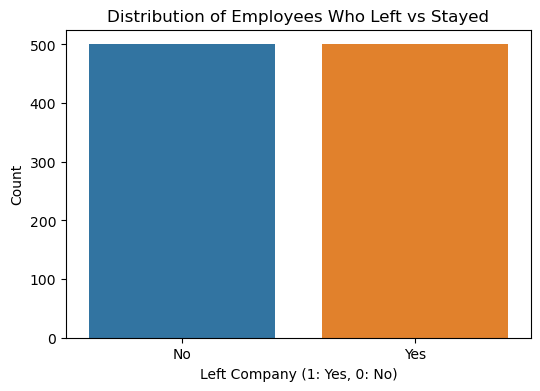

In [58]:
# Visualize the distribution of the target variable (left_company)
plt.figure(figsize=(6, 4))
sns.countplot(x='left_company', data=df)
plt.title('Distribution of Employees Who Left vs Stayed')
plt.xlabel('Left Company (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()

In [60]:
# Identify categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)


Categorical Columns: Index(['left_company', 'frequency_of_travel', 'department', 'gender',
       'position', 'married_or_single'],
      dtype='object')


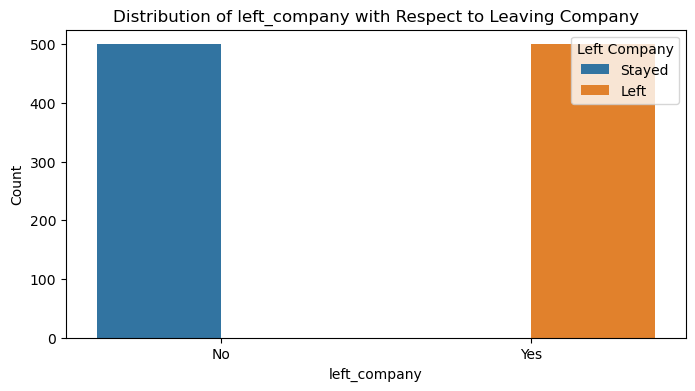

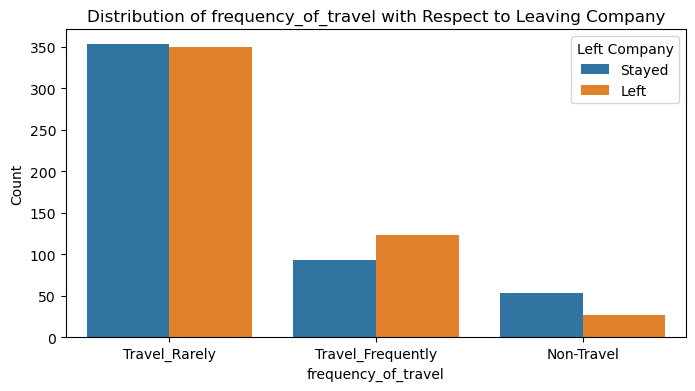

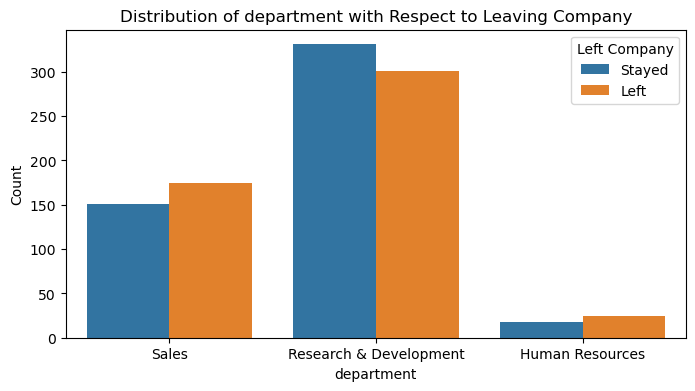

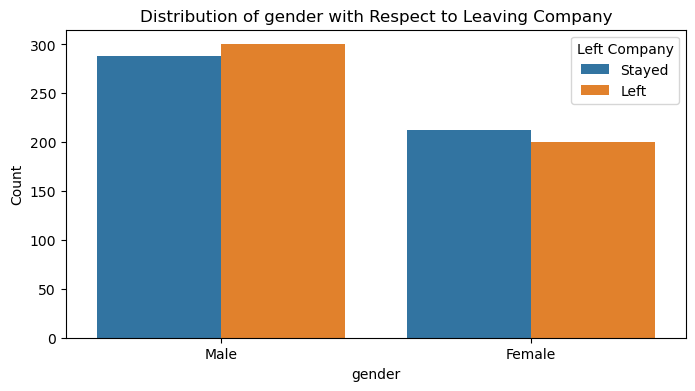

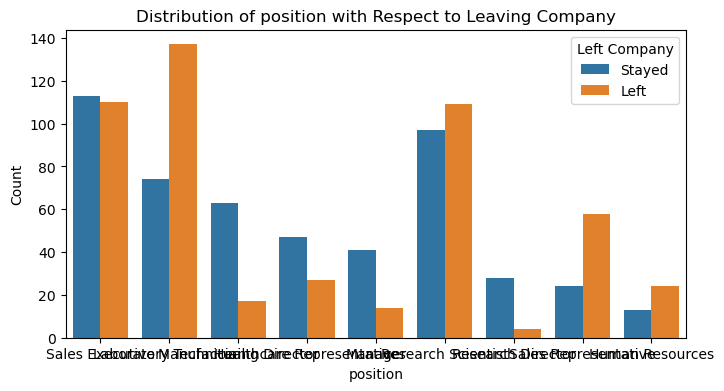

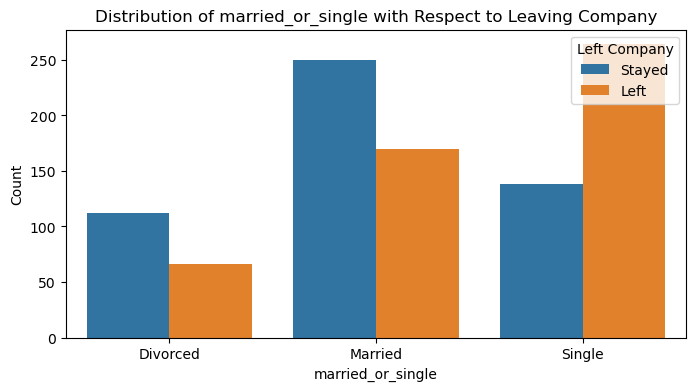

In [62]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='left_company', data=df)
    plt.title(f'Distribution of {col} with Respect to Leaving Company')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Left Company', loc='upper right', labels=['Stayed', 'Left'])
    plt.show()

In [64]:
# Identify numeric variables
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric Columns:", numeric_cols)

Numeric Columns: Index(['age', 'commuting_distance', 'education',
       'satisfaction_with_environment', 'seniority_level',
       'satisfaction_with_job', 'last_raise_pct', 'last_performance_rating',
       'total_years_working', 'years_at_company', 'years_in_current_job',
       'years_since_last_promotion', 'years_with_current_supervisor'],
      dtype='object')


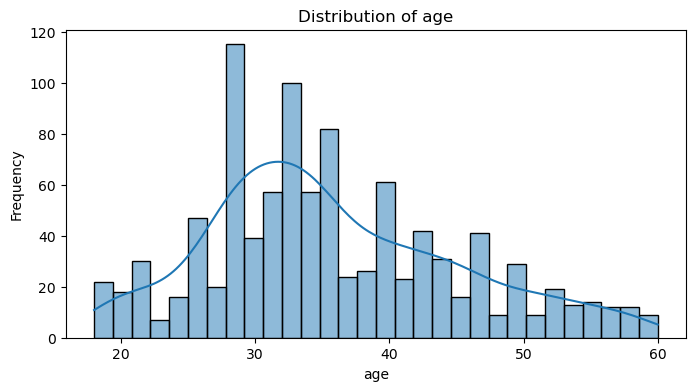

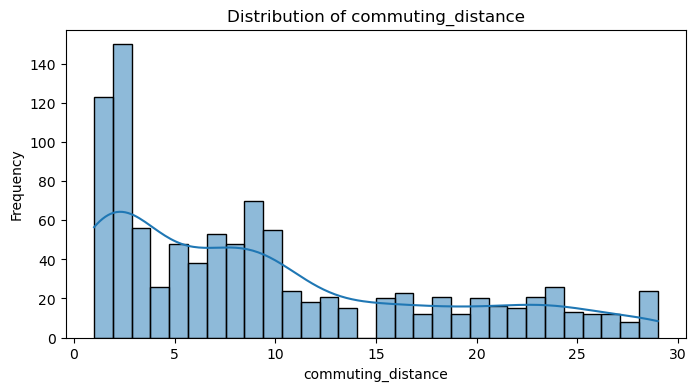

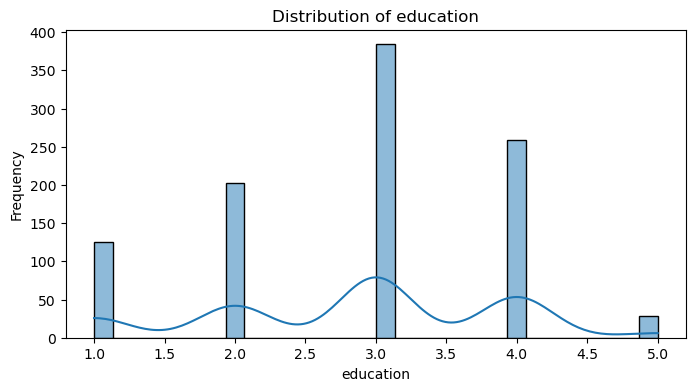

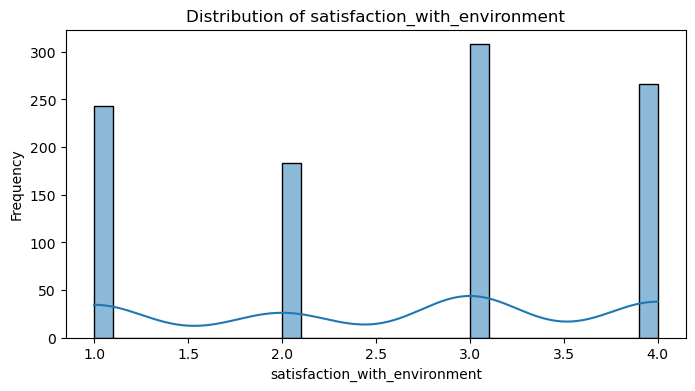

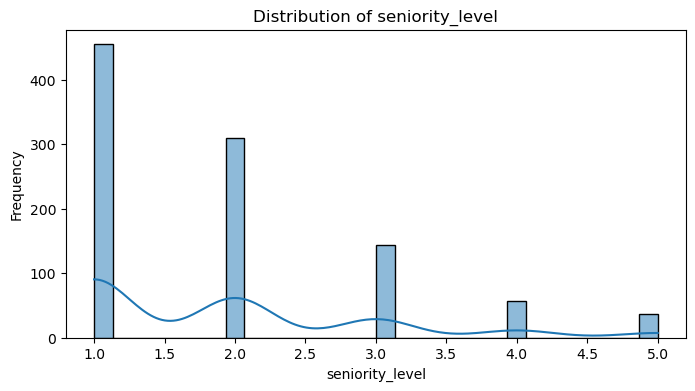

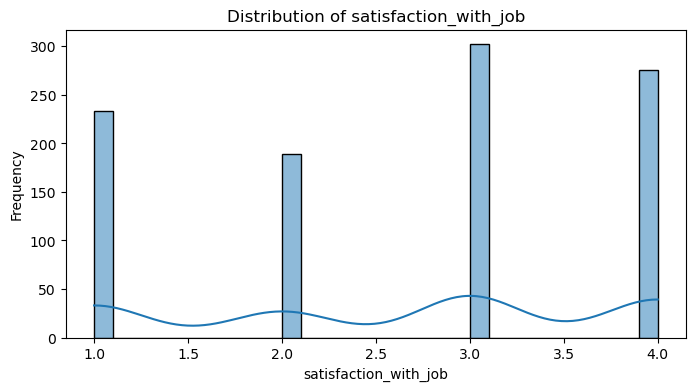

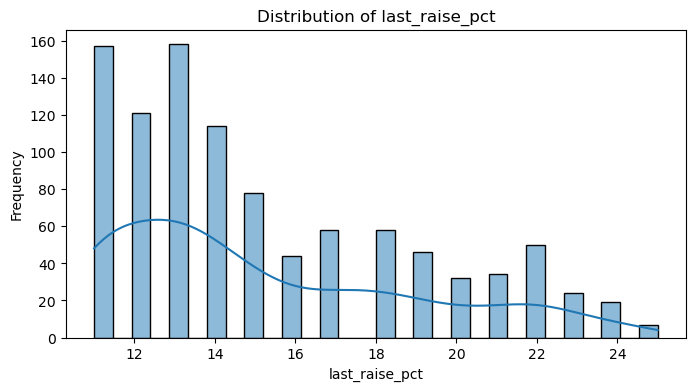

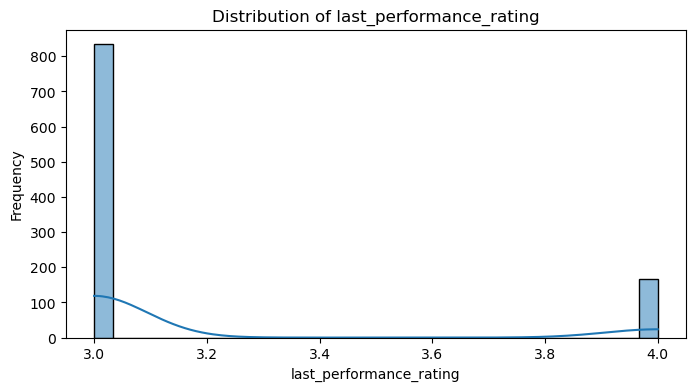

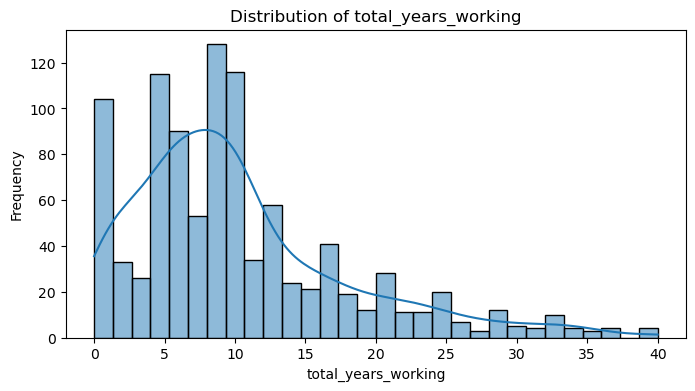

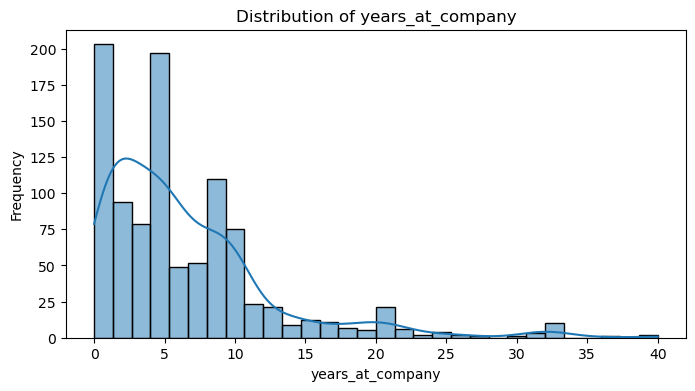

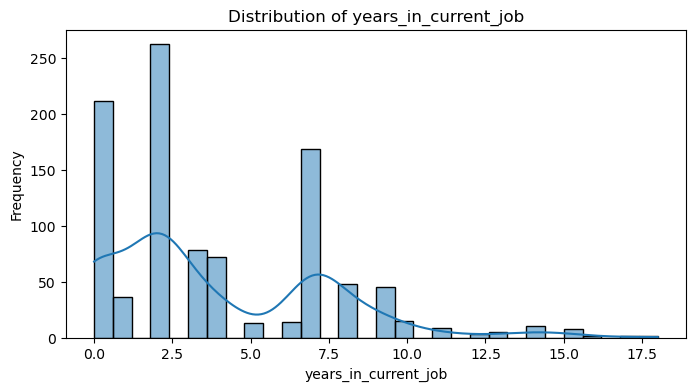

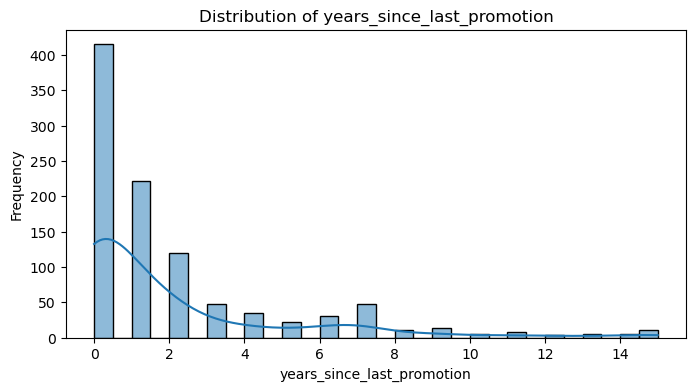

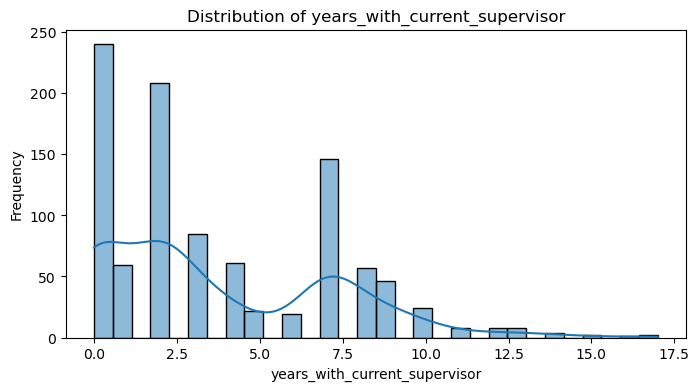

In [66]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

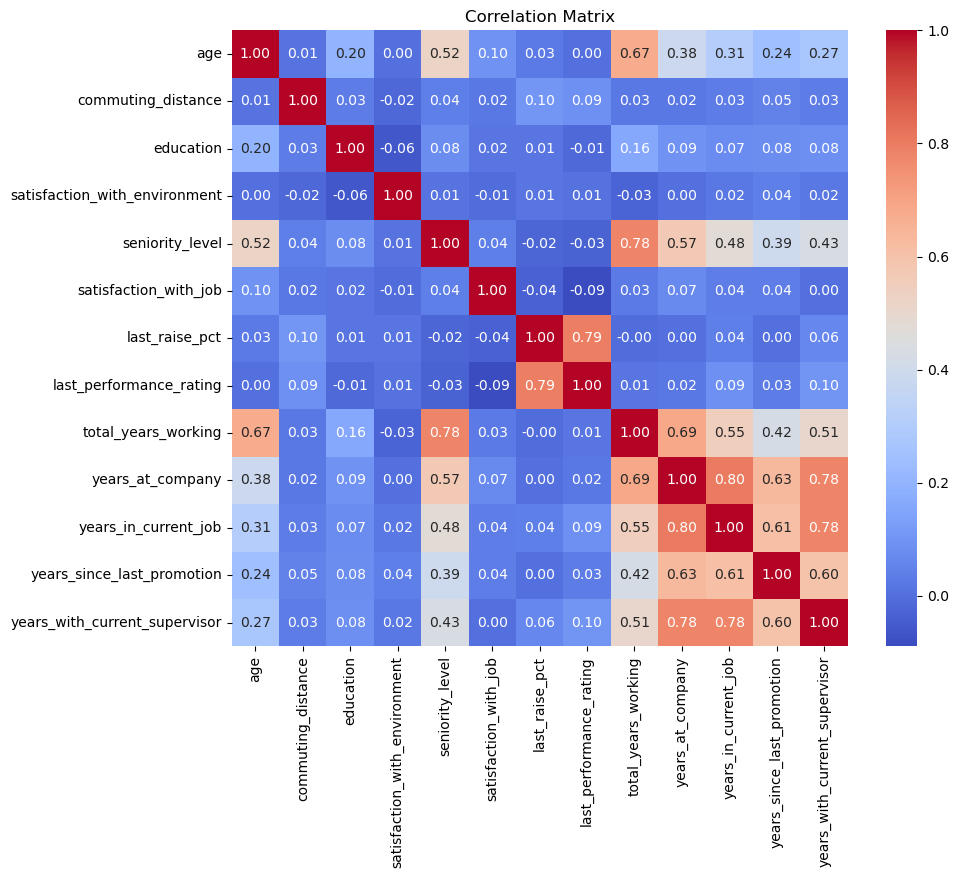

In [68]:
# Calculate the correlation matrix for numeric variables
correlation_matrix = df[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

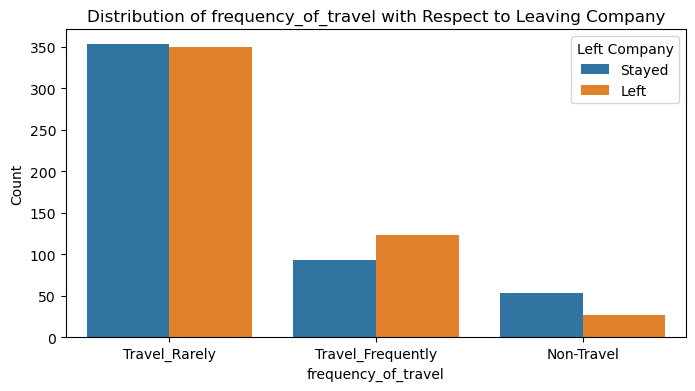

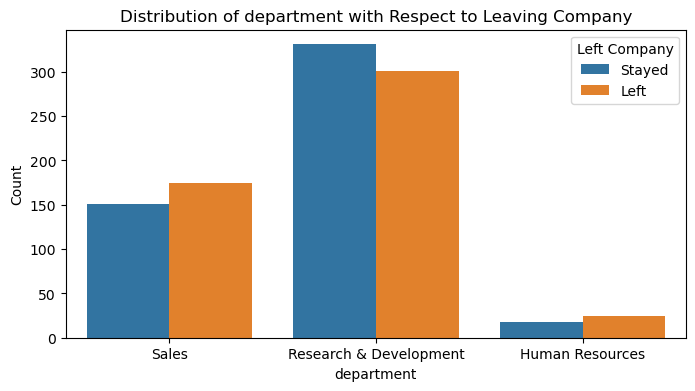

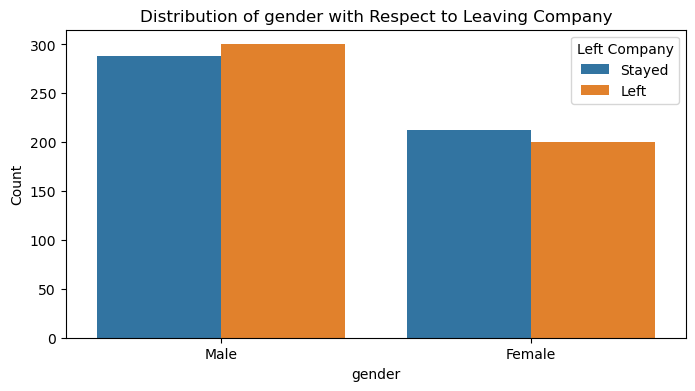

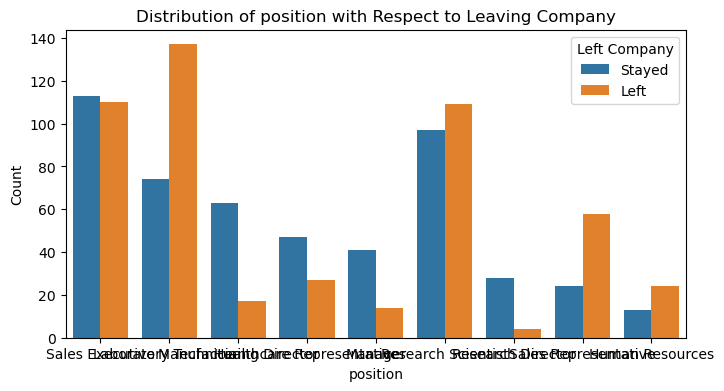

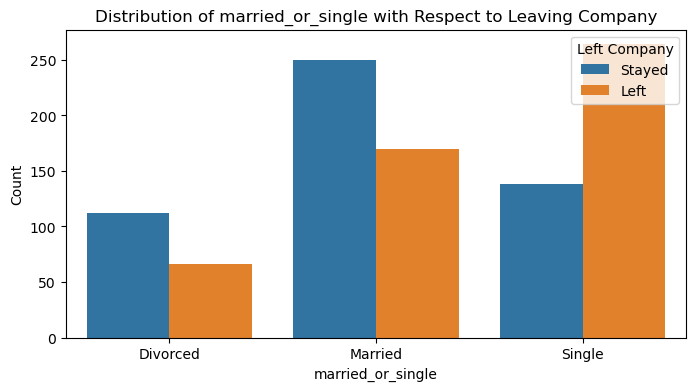

In [72]:
# Group by categorical features and analyze their relationship with 'left_company'
for col in categorical_cols:
    if col != 'left_company':  # Exclude the target variable
        plt.figure(figsize=(8, 4))
        sns.countplot(x=col, hue='left_company', data=df)
        plt.title(f'Distribution of {col} with Respect to Leaving Company')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.legend(title='Left Company', loc='upper right', labels=['Stayed', 'Left'])
        plt.show()



In [74]:
# Check mean values of numeric features against the target variable
grouped_means = df.groupby('left_company')[numeric_cols].mean()
print("Mean Values of Numeric Features by Target Variable:\n", grouped_means)


Mean Values of Numeric Features by Target Variable:
                  age  commuting_distance  education  \
left_company                                          
No            37.394               8.886      2.966   
Yes           34.032              10.300      2.762   

              satisfaction_with_environment  seniority_level  \
left_company                                                   
No                                    2.750            2.148   
Yes                                   2.444            1.670   

              satisfaction_with_job  last_raise_pct  last_performance_rating  \
left_company                                                                   
No                            2.784          15.520                    3.176   
Yes                           2.458          14.968                    3.156   

              total_years_working  years_at_company  years_in_current_job  \
left_company                                                           

C:\Users\phili\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


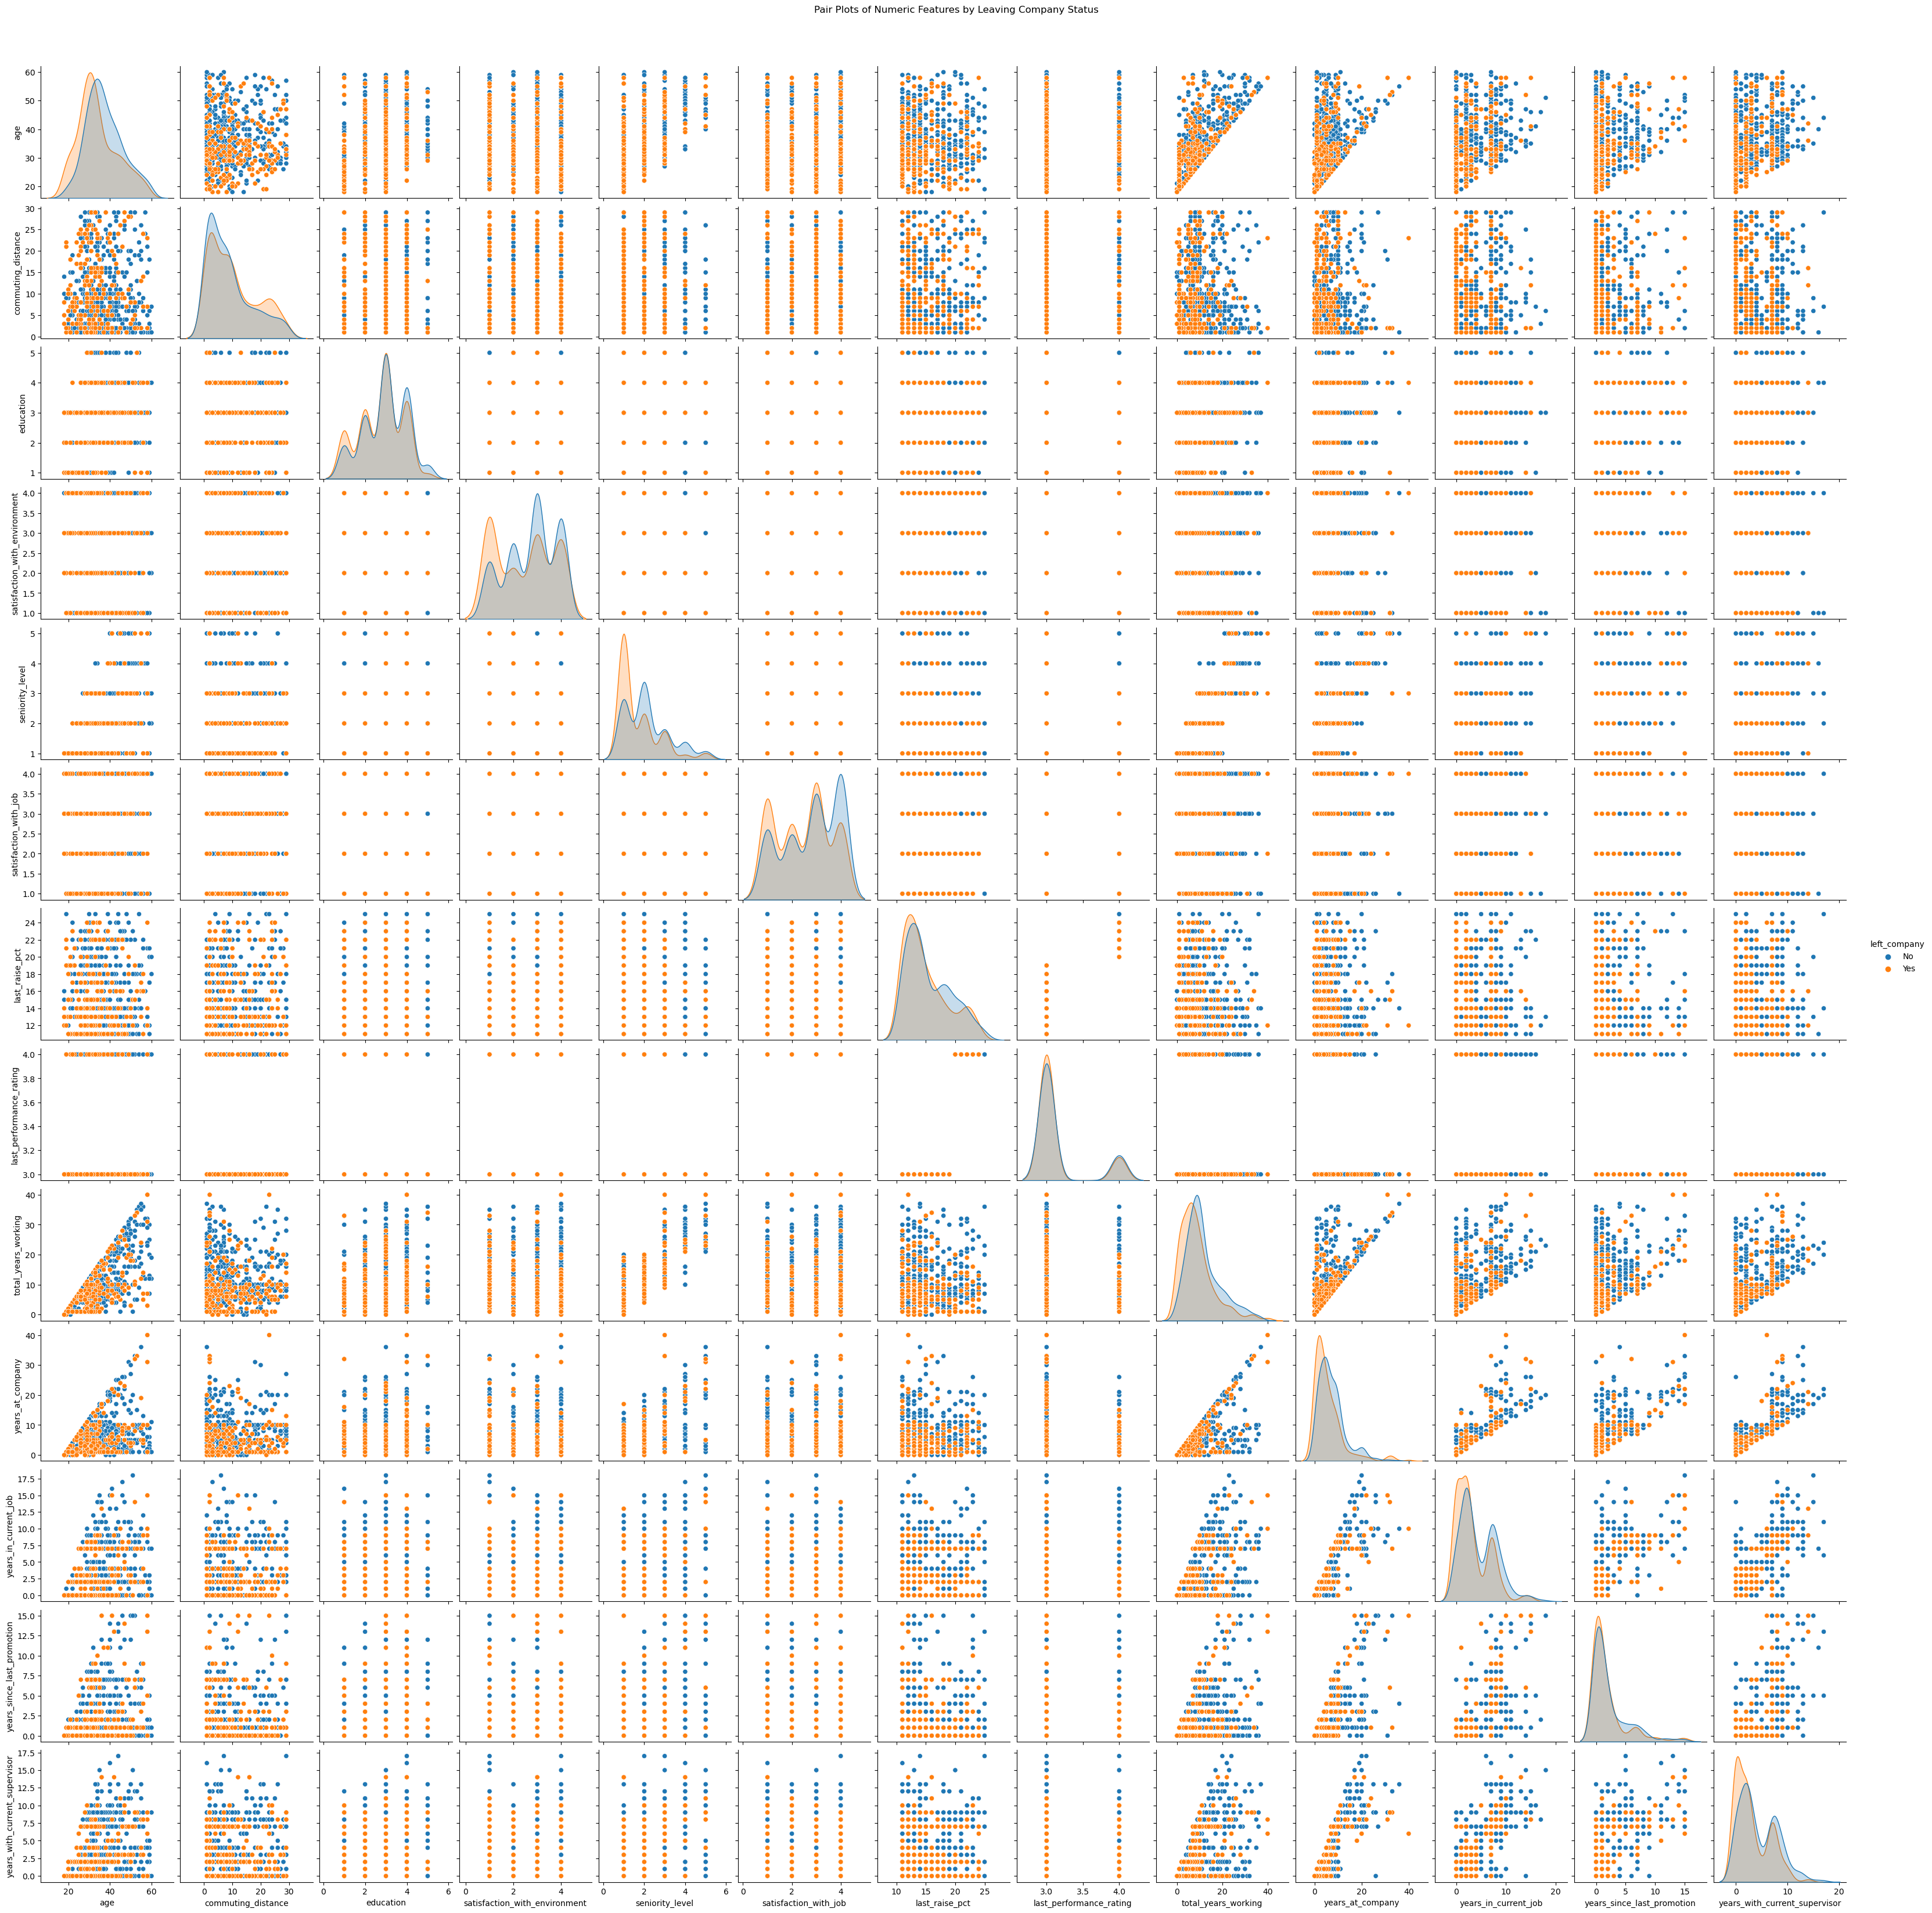

In [76]:
# Use pair plots to visualize relationships among numeric features and the target
sns.pairplot(df, hue='left_company', vars=numeric_cols)
plt.suptitle('Pair Plots of Numeric Features by Leaving Company Status', y=1.02)
plt.show()

In [83]:
# 1. Tenure Groups (using years_at_company)
tenure_bins = [0, 1, 3, 5, df['years_at_company'].max()]
tenure_labels = ['0-1 years', '1-3 years', '3-5 years', '5+ years']
df['tenure_group'] = pd.cut(df['years_at_company'], bins=tenure_bins, labels=tenure_labels, right=False)

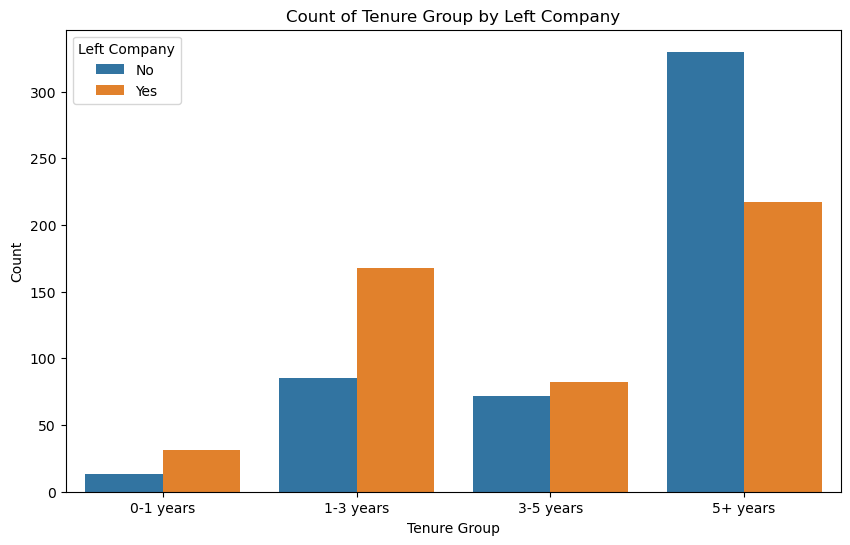

In [89]:
#3. Tenure Group vs. Left Company
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='tenure_group', hue='left_company')
plt.title('Count of Tenure Group by Left Company')
plt.ylabel('Count')
plt.xlabel('Tenure Group')
plt.legend(title='Left Company', labels=['No', 'Yes'])
plt.show()

The Exploratory Data Analysis (EDA) uncovered important information about employee turnover, focusing on the key variable left_company. The initial look at this variable showed a significant imbalance, with many more employees staying than leaving, which could affect how well any predictive models work down the line. When examining job roles and departments, it became clear that certain positions and teams experienced higher turnover rates, suggesting that some areas might need special attention to keep employees happier and engaged. Additionally, analyzing the impact of factors like tenure, age, and salary revealed that newer employees tend to leave more often, while older and better-paid employees were generally more likely to stay.

We also discovered interesting connections between different variables, such as how longer tenures are linked to lower turnover rates. This finding highlights the importance of retaining employees over time. Furthermore, the analysis opened up opportunities for improving our understanding of the data, like grouping continuous variables such as age and salary into categories to make them easier to interpret. Overall, these insights paint a clear picture of why employees decide to leave, offering a solid foundation for creating strategies to improve retention and make the workplace more appealing for everyone.

# Question 3
- Create and print a list of the variables that you would treat as numerical and another list for the variables that you would treat as categorical.  
- Explain your choices.

In [91]:
# numerical_vars = []

numerical_vars = [
    'age',
    'commuting_distance',
    'satisfaction_with_environment',
    'satisfaction_with_job',
    'last_raise_pct',
    'last_performance_rating',
    'total_years_working',
    'years_at_company',
    'years_in_current_job',
    'years_since_last_promotion',
    'years_with_current_supervisor'
]
# categorical_Vars = []

categorical_vars = [
    'left_company',
    'frequency_of_travel',
    'department',
    'education',
    'gender',
    'seniority_level',
    'position',
    'married_or_single'
]

print("Numerical Variables:")
print(numerical_vars)
print("\nCategorical Variables:")
print(categorical_vars)

Numerical Variables:
['age', 'commuting_distance', 'satisfaction_with_environment', 'satisfaction_with_job', 'last_raise_pct', 'last_performance_rating', 'total_years_working', 'years_at_company', 'years_in_current_job', 'years_since_last_promotion', 'years_with_current_supervisor']

Categorical Variables:
['left_company', 'frequency_of_travel', 'department', 'education', 'gender', 'seniority_level', 'position', 'married_or_single']


Numerical Variables: These variables quantify measurable traits, which can take on a wide range of values. They are suitable for statistical analysis that relies on numerical calculations, correlations, and regression algorithms, making them essential for many modeling approaches.

Categorical Variables: These represent discrete categories or groups. They are often used to segment or group data, making them vital for classification tasks. Categorical variables are typically encoded using techniques such as one-hot encoding to be suitable for modeling.

# Question 4
- Split the data into training and test sets.  
- Use 20% of the data for test and a random state of 124.  

In [96]:
X = df.drop('left_company', axis=1)  # Features
y = df['left_company']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=124)

# Print out the sizes of the resulting datasets
print(f"Training set size: {X_train.shape[0]} records")
print(f"Test set size: {X_test.shape[0]} records")

Training set size: 800 records
Test set size: 200 records


# Question 5
- Create a pipeline to process the numerical data.  
- Create a pipeline to process the categorical data.  

Verify each pipeline contains the columns you would expect using a fit_transform on the training data, i.e., print the shapes of the fit_transforms for each pipeline.

In [102]:
# Sample DataFrame structure
data = {
    'age': [25, 30, 35, 40],
    'commuting_distance': [5, 10, None, 20],
    'satisfaction_with_environment': [4, 5, 3, 2],
    'left_company': [0, 1, 1, 0],
    'frequency_of_travel': ['Rarely', 'Sometimes', 'Often', 'Never'],
    'department': ['IT', 'HR', 'Sales', 'IT'],
    'education': ['Bachelor', 'Master', 'High School', 'Bachelor']
}

df = pd.DataFrame(data)

# Define numerical and categorical features
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Create a pipeline for numerical features
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())                    # Scale the data
])

# Create a pipeline for categorical features
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('encoder', OneHotEncoder(handle_unknown='ignore'))     # One-hot encoding
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

# Fit and transform the training data using the preprocessor
X_train_processed = preprocessor.fit_transform(X_train)

# Print the shapes of the transformed features
print("Shape of transformed numerical data:", numerical_pipeline.fit_transform(X_train[numerical_features]).shape)
print("Shape of transformed categorical data:", categorical_pipeline.fit_transform(X_train[categorical_features]).shape)
print("Overall shape after processing:", X_train_processed.shape)

Shape of transformed numerical data: (3, 3)
Shape of transformed categorical data: (3, 9)
Overall shape after processing: (3, 12)


# Question 6
- Create a pipeline that combines the pre-processing and implements a logistic regression model.  
- Print the accuracy on the training set and the test set.
- Do you have any concerns of overfitting based on the differences between the two accuracy scores?

In [112]:
# Create a pipeline for preprocessing with Logistic Regression
pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])),
    ('model', LogisticRegression())
])

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Predict and calculate accuracy for the training set
y_train_pred = pipeline.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict and calculate accuracy for the test set
y_test_pred = pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracies
print(f"Training set accuracy: {train_accuracy:.4f}")
print(f"Test set accuracy: {test_accuracy:.4f}")

Training set accuracy: 1.0000
Test set accuracy: 0.0000


Concerns About Overfitting:

High Training Accuracy and Low Test Accuracy: If you notice a high training set accuracy accompanied by a significantly lower accuracy on the test set, this could indicate overfitting. Overfitting occurs when the model learns the noise and details in the training data to the extent that it negatively impacts its performance on new data.
Similar Accuracies: On the other hand, if both accuracies are similar and reasonably high, then your model is generalizing well.

# Question 7
What would you recommend as potential next steps for continuing to develop and evaluate a model?

To address the issue of overfitting in the model, it is recommended to start by simplifying it. Consider reducing the complexity by using a less complex algorithm or decreasing the number of parameters. Additionally, implementing regularization techniques such as L1 (Lasso) or L2 (Ridge) can help penalize complexity and improve generalization, leading to better performance on unseen data.

Next, a focus on enhancing the training dataset is necessary. If possible, gather more data or apply data augmentation techniques to artificially increase the size and variability of the dataset. This can help the model learn more robust patterns and reduce overfitting. Alongside that, utilizing cross-validation methods can provide more reliable estimates of model performance and ensure that the model is adequately evaluated across different subsets of the data.

Lastly, conducting a thorough analysis of the features by employing feature selection methods will help retain only the most relevant predictors. Visualizing learning curves can also provide insights into how the model is learning and whether it exhibits typical signs of overfitting. These steps will guide the model development and evaluation, ultimately leading to improved performance and generalization.